In [197]:
import io
import numpy as np
import random
from tensorflow import keras
from tensorflow.keras import layers
from keras.utils import get_file
import matplotlib.pyplot as plt

In [198]:
fname = '/kaggle/input/ukrainian-texts/Lisova_pisnya_1371650989.txt'
text_data_url = "https://www.kaggle.com/datasets/mykras/ukrainian-texts/data?select=Lisova_pisnya_1371650989.txt"
path = get_file(fname, text_data_url)

# Load the text data
with io.open(path, encoding="utf-8") as f:
    text = f.read().lower()
text = text.replace("\n", " ")
print("Corpus length:", len(text))

chars = sorted(list(set(text)))
print("Total chars:", len(chars))
char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))

Corpus length: 92883
Total chars: 60


In [199]:
maxlen = 40
step = 3
sentences = []
next_chars = []
for i in range(0, len(text) - maxlen, step):
    sentences.append(text[i: i + maxlen])
    next_chars.append(text[i + maxlen])
print("Number of sequences:", len(sentences))

Number of sequences: 30948


In [200]:
x = np.zeros((len(sentences), maxlen, len(chars)), dtype="bool")
y = np.zeros((len(sentences),), dtype="int")
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        x[i, t, char_indices[char]] = 1
    y[i] = char_indices[next_chars[i]]

In [201]:
model = keras.Sequential(
    [
        keras.Input(shape=(maxlen, len(chars))),
#         layers.Bidirectional(layers.LSTM(256, return_sequences=True)),
        layers.Bidirectional(layers.LSTM(150)),
        layers.Dense(len(chars), activation="softmax"),
    ]
)
optimizer = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=['accuracy'])


In [202]:
def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype("float64")
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

In [203]:
history = model.fit(x, y, batch_size=128, epochs=40, verbose=1)

Epoch 1/40
242/242 [==============================] - 6s 9ms/step - loss: 2.7217 - accuracy: 0.2898
Epoch 2/40
242/242 [==============================] - 2s 8ms/step - loss: 2.2143 - accuracy: 0.3656
Epoch 3/40
242/242 [==============================] - 2s 8ms/step - loss: 2.0401 - accuracy: 0.4047
Epoch 4/40
242/242 [==============================] - 2s 8ms/step - loss: 1.9195 - accuracy: 0.4346
Epoch 5/40
242/242 [==============================] - 2s 8ms/step - loss: 1.8126 - accuracy: 0.4608
Epoch 6/40
242/242 [==============================] - 2s 8ms/step - loss: 1.7111 - accuracy: 0.4891
Epoch 7/40
242/242 [==============================] - 2s 8ms/step - loss: 1.6127 - accuracy: 0.5121
Epoch 8/40
242/242 [==============================] - 2s 8ms/step - loss: 1.5112 - accuracy: 0.5403
Epoch 9/40
242/242 [==============================] - 2s 8ms/step - loss: 1.4046 - accuracy: 0.5697
Epoch 10/40
242/242 [==============================] - 2s 8ms/step - loss: 1.2854 - accuracy: 0.6042

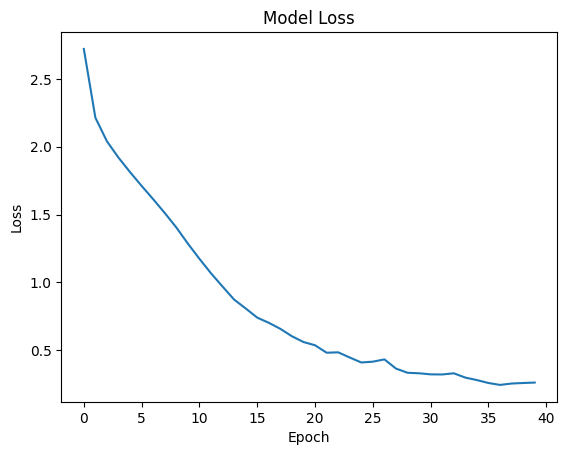

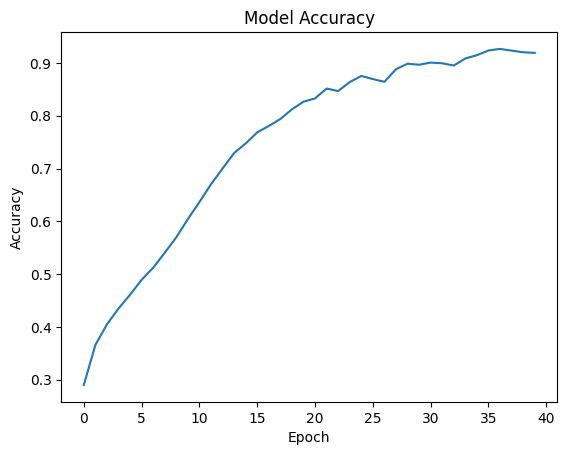

In [204]:
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [205]:
def generate_text(model, seed_text, maxlen, temperature=1.0, length=400):
    generated = seed_text
    sentence = seed_text
    for _ in range(length):
        x_pred = np.zeros((1, maxlen, len(chars)))
        for t, char in enumerate(sentence):
            x_pred[0, t, char_indices[char]] = 1.0
        preds = model.predict(x_pred, verbose=0)[0]
        next_index = sample(preds, temperature)
        next_char = indices_char[next_index]
        sentence = sentence[1:] + next_char
        generated += next_char
    return generated

In [206]:
generated_text = generate_text(model, seed_text="там  каганчики водою заливає,  псує мої ", maxlen=maxlen, temperature=0.5, length=400)

print(generated_text)

там  каганчики водою заливає,  псує мої ніче нестанні буді. мавка з смівні, сипають.   (хадить б я дубе.   к а в к а  йду сповного так йде повиляну.   м а в к а  ой годе, стикаєш в чута.  і блиск спідни приспа- тільки в килиннах пострінько, блукаються ні стоя... ось я в відруй перелесний статнесь там хату мовча з переденько виходить очірівні колось.  коли риймай! м а т и ча до кида!  зринає в стала! він  вербить і прохиляється.  то й дл


In [207]:
start_index = random.randint(0, len(text) - maxlen - 1)
for diversity in [0.2, 0.5, 1.0, 1.2]:
    print("...Diversity:", diversity)

    generated = ""
    sentence = text[start_index : start_index + maxlen]
    print('...Generating with seed: "' + sentence + '"')

    for i in range(400):
        x_pred = np.zeros((1, maxlen, len(chars)))
        for t, char in enumerate(sentence):
            x_pred[0, t, char_indices[char]] = 1.0
        preds = model.predict(x_pred, verbose=0)[0]
        next_index = sample(preds, diversity)
        next_char = indices_char[next_index]
        sentence = sentence[1:] + next_char
        generated += next_char

    print("...Generated: ", generated)
    print("-")

...Diversity: 0.2
...Generating with seed: ", як біляві хмари  стануть покрай неба, "
...Generated:  міє ходить  кущка похов тоймерета.  коло видається в нас х ісе мазавши,            завлядину,  і задикає в русала. м а в к а  дублям спріли люлька я до годою...  хутчи, дереже, борва? м а в к а  (ши в тобі мені! не хочиш. я потам на вливає на йма і руша стимає) і з тоба? що вити з парно винень,             з вітрумалу постітились.   м а в к а            не вертиться до білу поволоденьком, -  не за
-
...Diversity: 0.5
...Generating with seed: ", як біляві хмари  стануть покрай неба, "
...Generated:  мінні наче непостутно вородить. (хливви снігоко,  не слудна  гарять рукотіся колись руховин.    перече, потинка тихо"!  немаю в руки, очерев скалі й до до вкрава силілко. л у к а ш я буде тробить! (хвілки те виказ сестр. л у к а ш            як жу, стинуй мивер  колись за сестила полелоді  з пололом'яз верховіть за вербо,            дядьковень!  на й повпаску співає білий лісоветурехах білу к